# Lecture 9: Data Visualization with Seaborn & Multi-Panel Figures
## F&W ECOL 458: Environmental Data Science

**Learning Objectives:**
- Create histograms and box plots for distributions
- Build multi-panel figures with subplots
- Use Seaborn for cleaner statistical visualizations
- Save publication-quality figures

**Environment:** Google Colab

---

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Create sample datasets
np.random.seed(42)

# Dataset 1: Stream monitoring
dates = pd.date_range('2024-01-01', '2024-12-31', freq='D')
n_days = len(dates)
day_of_year = np.arange(n_days)
seasonal_temp = 12 + 10 * np.sin(2 * np.pi * (day_of_year - 80) / 365)

stream_data = pd.DataFrame({
    'date': dates,
    'temperature_c': seasonal_temp + np.random.normal(0, 2, n_days),
    'discharge_cms': np.random.exponential(2, n_days) + 0.5,
    'month': dates.month,
    'season': pd.cut(dates.month, bins=[0, 3, 6, 9, 12],
                     labels=['Winter', 'Spring', 'Summer', 'Fall'])
})

# Dataset 2: Tree inventory
np.random.seed(123)
n_trees = 120
tree_data = pd.DataFrame({
    'species': np.random.choice(['Oak', 'Maple', 'Pine', 'Birch'], n_trees,
                                 p=[0.30, 0.35, 0.25, 0.10]),
    'dbh_cm': np.random.uniform(10, 60, n_trees),
    'site': np.random.choice(['Site A', 'Site B', 'Site C'], n_trees)
})
tree_data['height_m'] = 5 + 0.4 * tree_data['dbh_cm'] + np.random.normal(0, 3, n_trees)
tree_data['height_m'] = tree_data['height_m'].clip(lower=3)

# Dataset 3: Water quality
n_samples = 40
water_quality = pd.DataFrame({
    'site': np.repeat(['Upstream', 'Midstream', 'Downstream'], n_samples),
    'ph': np.concatenate([
        np.random.normal(7.5, 0.3, n_samples),
        np.random.normal(7.2, 0.4, n_samples),
        np.random.normal(6.8, 0.5, n_samples)
    ]),
    'dissolved_oxygen': np.concatenate([
        np.random.normal(9.5, 1.0, n_samples),
        np.random.normal(8.0, 1.2, n_samples),
        np.random.normal(6.5, 1.5, n_samples)
    ])
})

print("Datasets ready!")

Datasets ready!


---
## 1. Histograms

**Best for:** Showing the distribution of a single continuous variable

### 1.1 Basic Histogram

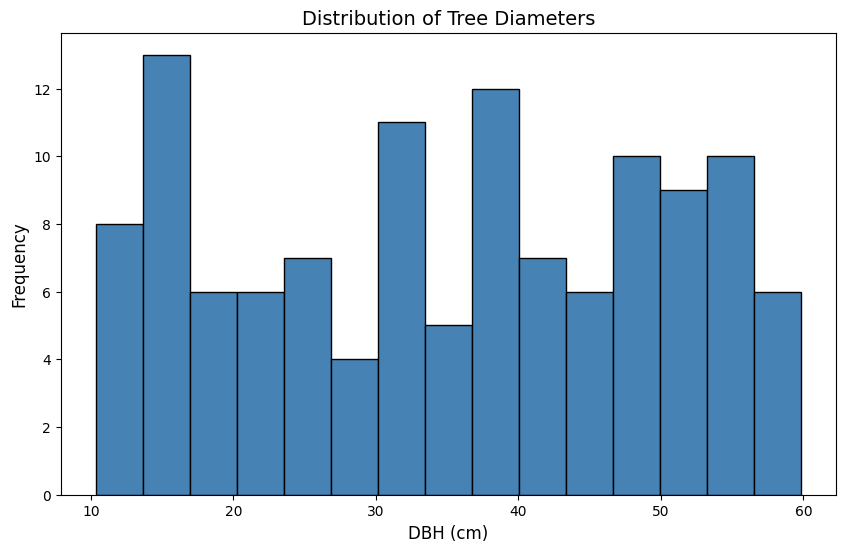

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(tree_data['dbh_cm'], bins=15, color='steelblue', edgecolor='black')

ax.set_xlabel('DBH (cm)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Tree Diameters', fontsize=14)

plt.show()

### 1.2 Adding Summary Statistics

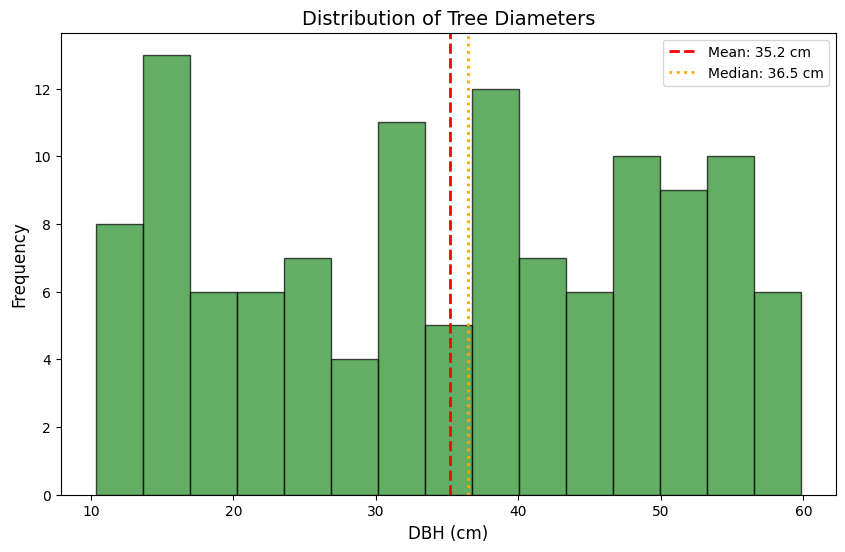

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(tree_data['dbh_cm'], bins=15, color='forestgreen',
        edgecolor='black', alpha=0.7)

# Add vertical lines for mean and median
mean_dbh = tree_data['dbh_cm'].mean()
median_dbh = tree_data['dbh_cm'].median()

ax.axvline(mean_dbh, color='red', linestyle='--', linewidth=2,
           label=f'Mean: {mean_dbh:.1f} cm')
ax.axvline(median_dbh, color='orange', linestyle=':', linewidth=2,
           label=f'Median: {median_dbh:.1f} cm')

ax.set_xlabel('DBH (cm)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Tree Diameters', fontsize=14)
ax.legend()

plt.show()

### 1.3 Comparing Distributions

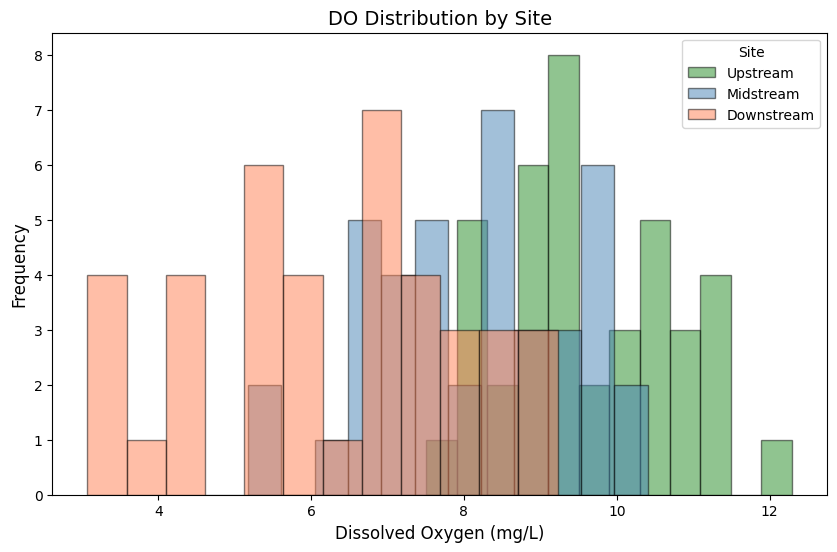

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot overlapping histograms
for site, color in zip(['Upstream', 'Midstream', 'Downstream'],
                        ['forestgreen', 'steelblue', 'coral']):
    data = water_quality[water_quality['site'] == site]['dissolved_oxygen']
    ax.hist(data, bins=12, alpha=0.5, label=site, color=color, edgecolor='black')

ax.set_xlabel('Dissolved Oxygen (mg/L)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('DO Distribution by Site', fontsize=14)
ax.legend(title='Site')

plt.show()

---
## 2. Box Plots

**Best for:** Comparing distributions across groups, identifying outliers

### 2.1 Anatomy of a Box Plot

In [ ]:
print("""
Box Plot Anatomy:
═══════════════════════════════════════════════════

         ┬ ─── Maximum (within 1.5×IQR of Q3)
         │
         │
    ┌────┴────┐
    │         │ ─── Q3 (75th percentile)
    │─────────│ ─── Median (Q2, 50th percentile)
    │         │ ─── Q1 (25th percentile)
    └────┬────┘
         │
         │       IQR = Q3 - Q1 (Interquartile Range)
         ┴ ─── Minimum (within 1.5×IQR of Q1)

    ○    ○ ─── Outliers (beyond 1.5×IQR)

═══════════════════════════════════════════════════
""")


Box Plot Anatomy:
═══════════════════════════════════════════════════

         ┬ ─── Maximum (within 1.5×IQR of Q3)
         │
         │
    ┌────┴────┐
    │         │ ─── Q3 (75th percentile)
    │─────────│ ─── Median (Q2, 50th percentile)
    │         │ ─── Q1 (25th percentile)
    └────┬────┘
         │       
         │       IQR = Q3 - Q1 (Interquartile Range)
         ┴ ─── Minimum (within 1.5×IQR of Q1)
    
    ○    ○ ─── Outliers (beyond 1.5×IQR)

═══════════════════════════════════════════════════



### 2.2 Creating Box Plots

/tmp/ipython-input-2459072251.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_species, labels=species_list, patch_artist=True)


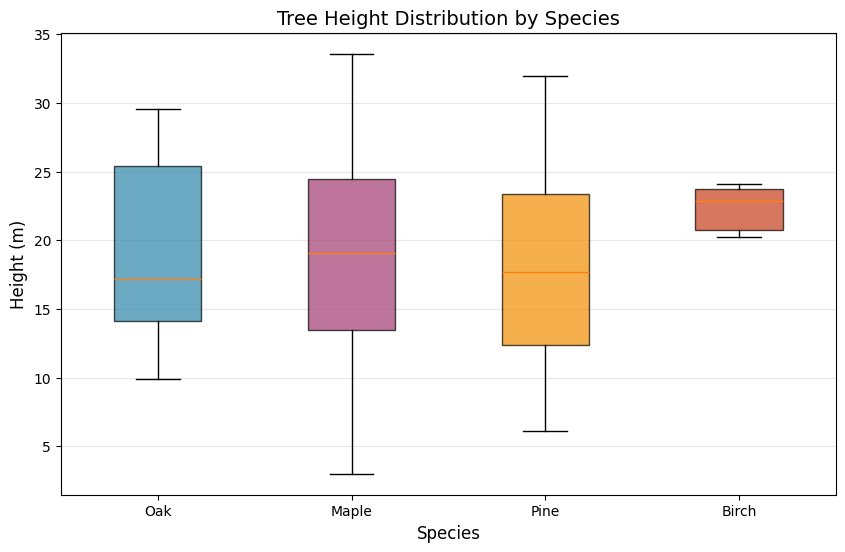

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data by species
species_list = ['Oak', 'Maple', 'Pine', 'Birch']
data_by_species = [tree_data[tree_data['species'] == sp]['height_m']
                   for sp in species_list]

# Create boxplot
bp = ax.boxplot(data_by_species, labels=species_list, patch_artist=True)

# Color the boxes
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Species', fontsize=12)
ax.set_ylabel('Height (m)', fontsize=12)
ax.set_title('Tree Height Distribution by Species', fontsize=14)
ax.grid(True, axis='y', alpha=0.3)

plt.show()

---
## 3. Multi-Panel Figures with Subplots

Combine multiple plots into one figure for comparison or comprehensive display.

### 3.1 Basic Grid Layout

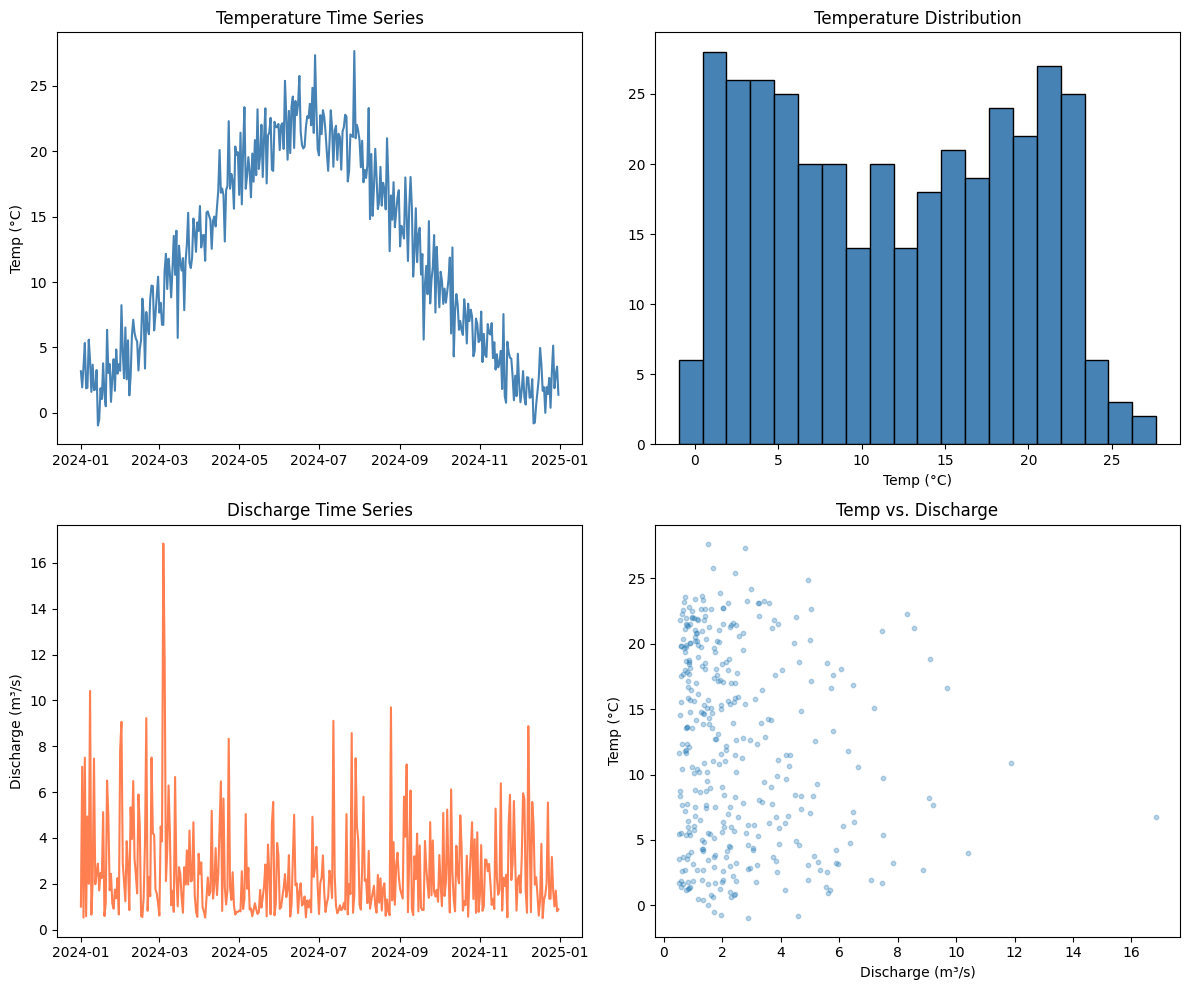

In [ ]:
# Create a 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# axes is now a 2D array: axes[row, col]
# Top-left
axes[0, 0].plot(stream_data['date'], stream_data['temperature_c'], color='steelblue')
axes[0, 0].set_title('Temperature Time Series')
axes[0, 0].set_ylabel('Temp (°C)')

# Top-right
axes[0, 1].hist(stream_data['temperature_c'], bins=20, color='steelblue', edgecolor='black')
axes[0, 1].set_title('Temperature Distribution')
axes[0, 1].set_xlabel('Temp (°C)')

# Bottom-left
axes[1, 0].plot(stream_data['date'], stream_data['discharge_cms'], color='coral')
axes[1, 0].set_title('Discharge Time Series')
axes[1, 0].set_ylabel('Discharge (m³/s)')

# Bottom-right
axes[1, 1].scatter(stream_data['discharge_cms'], stream_data['temperature_c'],
                   alpha=0.3, s=10)
axes[1, 1].set_title('Temp vs. Discharge')
axes[1, 1].set_xlabel('Discharge (m³/s)')
axes[1, 1].set_ylabel('Temp (°C)')

# Prevent overlapping
plt.tight_layout()
plt.show()

### 3.2 Single Row or Column

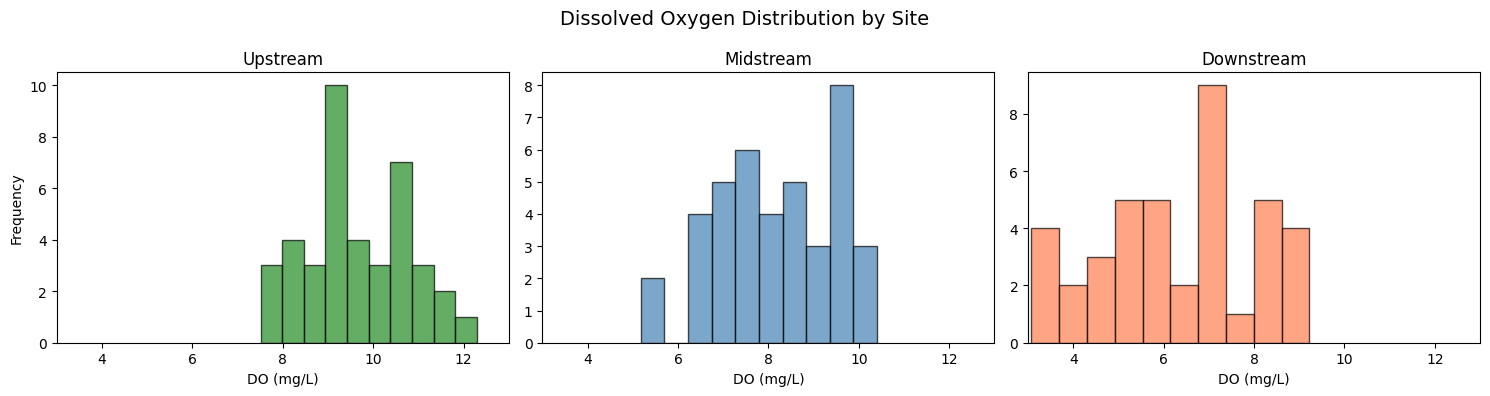

In [ ]:
# 1 row × 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sites = ['Upstream', 'Midstream', 'Downstream']
colors = ['forestgreen', 'steelblue', 'coral']

for ax, site, color in zip(axes, sites, colors):
    data = water_quality[water_quality['site'] == site]['dissolved_oxygen']
    ax.hist(data, bins=10, color=color, edgecolor='black', alpha=0.7)
    ax.set_title(site, fontsize=12)
    ax.set_xlabel('DO (mg/L)')
    ax.set_xlim(3, 13)  # Same x-axis for comparison

axes[0].set_ylabel('Frequency')

plt.suptitle('Dissolved Oxygen Distribution by Site', fontsize=14)
plt.tight_layout()
plt.show()

### 3.3 Shared Axes for Easier Comparison

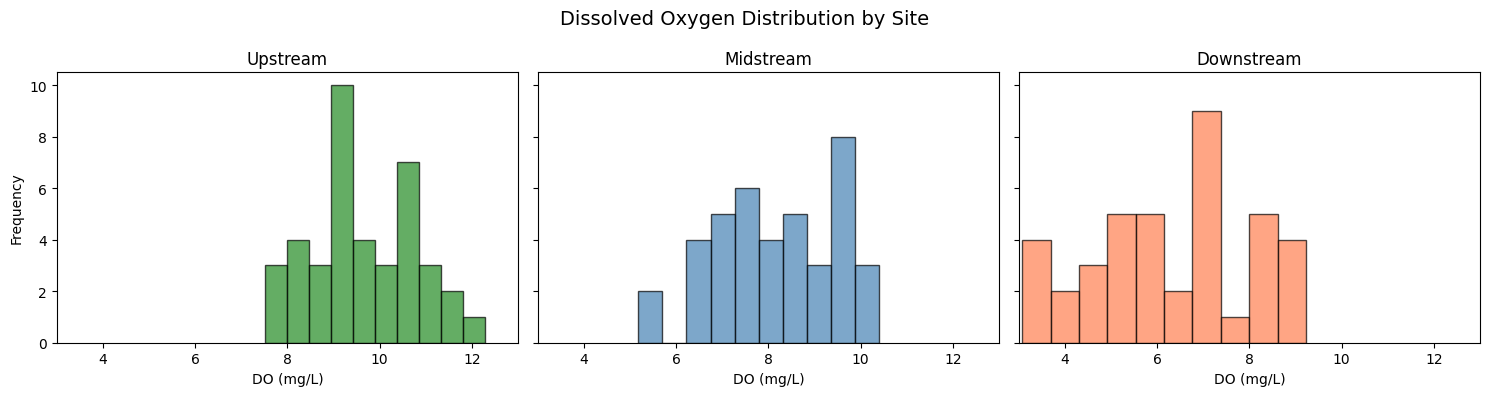

In [ ]:
# sharey=True makes all y-axes identical
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for ax, site, color in zip(axes, sites, colors):
    data = water_quality[water_quality['site'] == site]['dissolved_oxygen']
    ax.hist(data, bins=10, color=color, edgecolor='black', alpha=0.7)
    ax.set_title(site, fontsize=12)
    ax.set_xlabel('DO (mg/L)')
    ax.set_xlim(3, 13)

axes[0].set_ylabel('Frequency')  # Only need label on first

plt.suptitle('Dissolved Oxygen Distribution by Site', fontsize=14)
plt.tight_layout()
plt.show()

---
## 4. Introduction to Seaborn

Seaborn is built on Matplotlib but provides:
- Cleaner syntax that works directly with DataFrames
- Better default aesthetics
- Built-in statistical visualizations

### 4.1 Seaborn vs Matplotlib

/tmp/ipython-input-3635486426.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(data_by_species, labels=species_list)


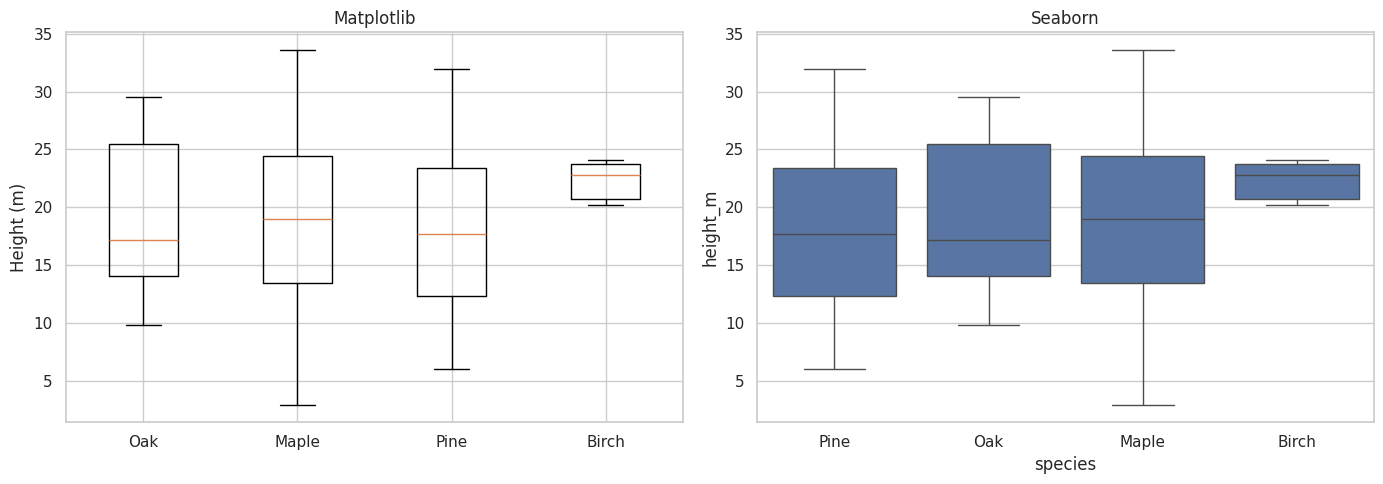

In [ ]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Compare: Matplotlib boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matplotlib (more code)
species_list = ['Oak', 'Maple', 'Pine', 'Birch']
data_by_species = [tree_data[tree_data['species'] == sp]['height_m']
                   for sp in species_list]
axes[0].boxplot(data_by_species, labels=species_list)
axes[0].set_title('Matplotlib', fontsize=12)
axes[0].set_ylabel('Height (m)')

# Seaborn (one line!)
sns.boxplot(data=tree_data, x='species', y='height_m', ax=axes[1])
axes[1].set_title('Seaborn', fontsize=12)

plt.tight_layout()
plt.show()

### 4.2 Histograms with KDE

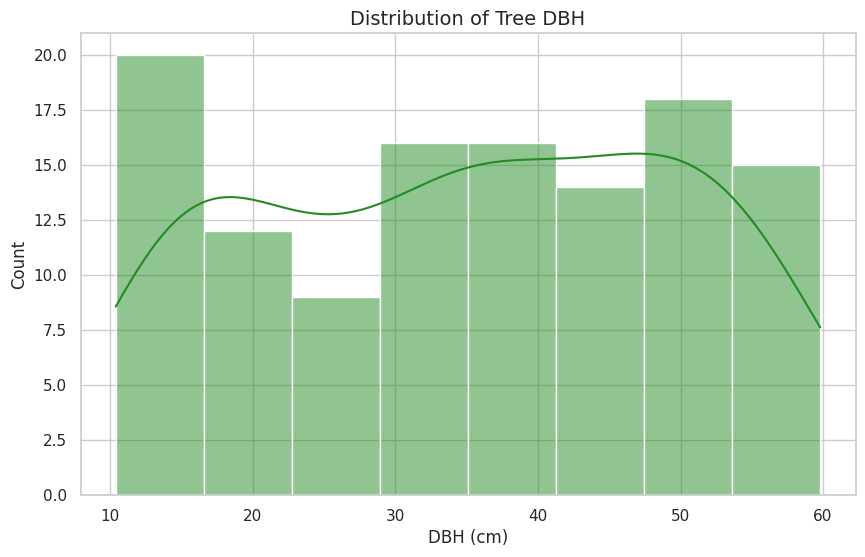

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram with kernel density estimate
sns.histplot(data=tree_data, x='dbh_cm', kde=True, color='forestgreen', ax=ax)

ax.set_xlabel('DBH (cm)', fontsize=12)
ax.set_title('Distribution of Tree DBH', fontsize=14)

plt.show()

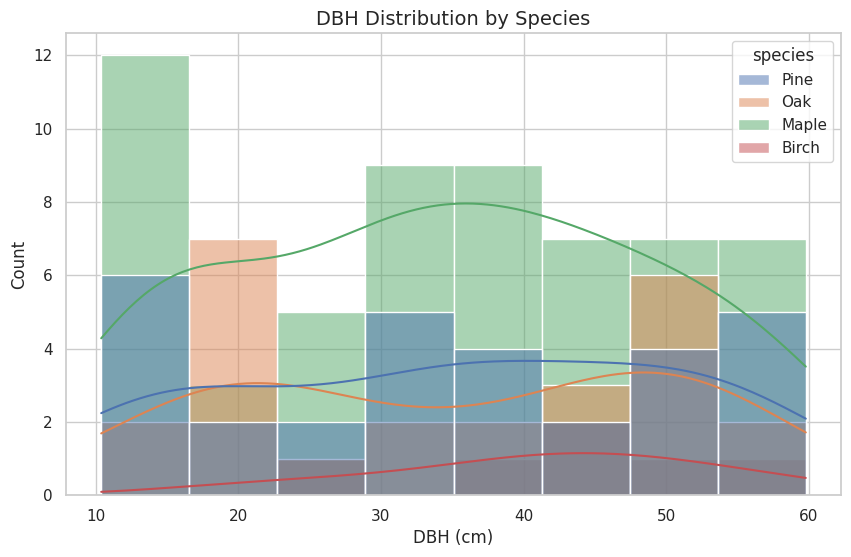

In [ ]:
# Split by category using 'hue'
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=tree_data, x='dbh_cm', hue='species', kde=True, alpha=0.5, ax=ax)

ax.set_xlabel('DBH (cm)', fontsize=12)
ax.set_title('DBH Distribution by Species', fontsize=14)

plt.show()

### 4.3 Box Plots and Violin Plots

/tmp/ipython-input-1271015739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=water_quality, x='site', y='dissolved_oxygen',
/tmp/ipython-input-1271015739.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=water_quality, x='site', y='dissolved_oxygen',


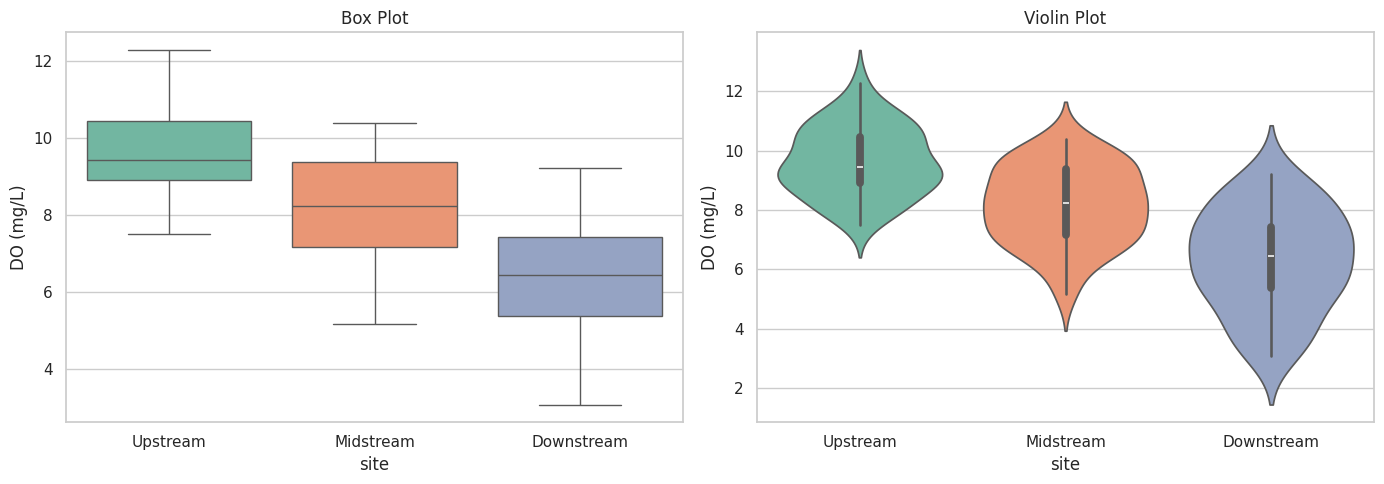

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
sns.boxplot(data=water_quality, x='site', y='dissolved_oxygen',
            palette='Set2', ax=axes[0])
axes[0].set_title('Box Plot', fontsize=12)
axes[0].set_ylabel('DO (mg/L)')

# Violin plot - shows full distribution shape
sns.violinplot(data=water_quality, x='site', y='dissolved_oxygen',
               palette='Set2', ax=axes[1])
axes[1].set_title('Violin Plot', fontsize=12)
axes[1].set_ylabel('DO (mg/L)')

plt.tight_layout()
plt.show()

### 4.4 Box Plot with Data Points

/tmp/ipython-input-3334530052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=water_quality, x='site', y='ph',


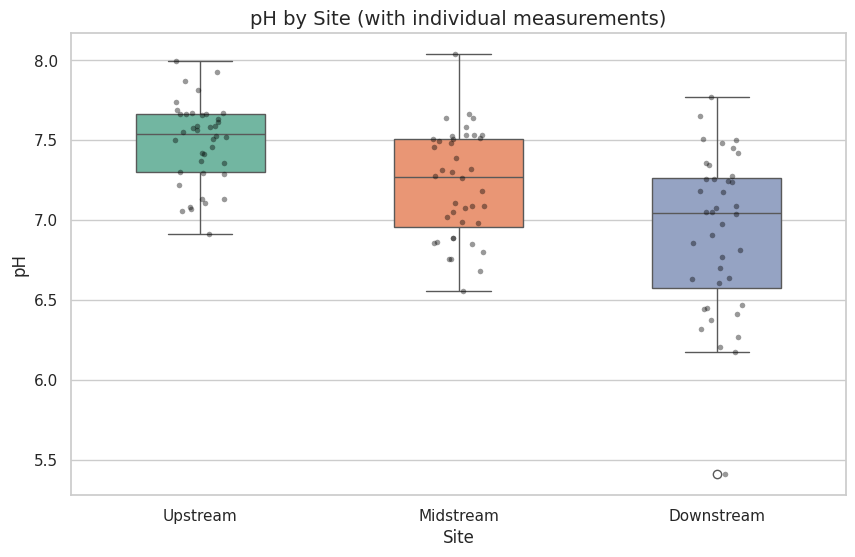

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Combine boxplot with stripplot to show individual points
sns.boxplot(data=water_quality, x='site', y='ph',
            palette='Set2', width=0.5, ax=ax)
sns.stripplot(data=water_quality, x='site', y='ph',
              color='black', alpha=0.4, size=4, ax=ax)

ax.set_xlabel('Site', fontsize=12)
ax.set_ylabel('pH', fontsize=12)
ax.set_title('pH by Site (with individual measurements)', fontsize=14)

plt.show()

### 4.5 Scatter Plots with Regression

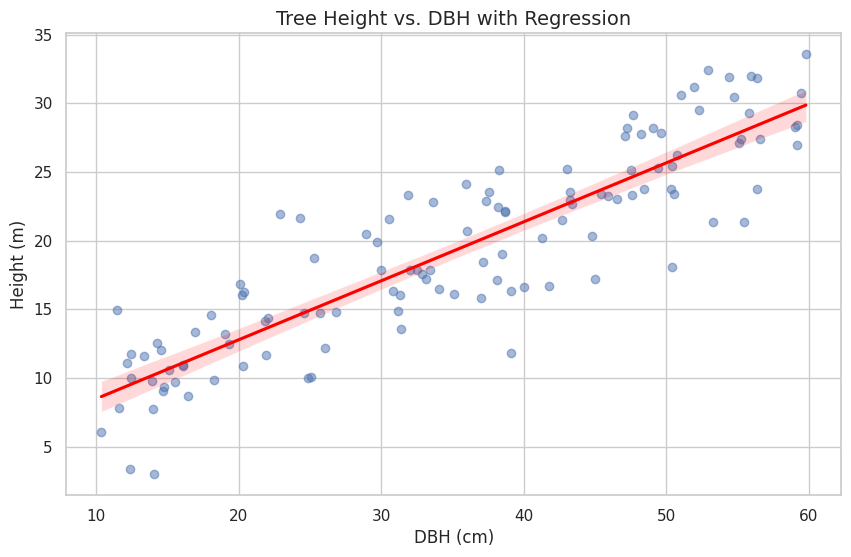

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with automatic regression line and confidence interval
sns.regplot(data=tree_data, x='dbh_cm', y='height_m',
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax)

ax.set_xlabel('DBH (cm)', fontsize=12)
ax.set_ylabel('Height (m)', fontsize=12)
ax.set_title('Tree Height vs. DBH with Regression', fontsize=14)

plt.show()

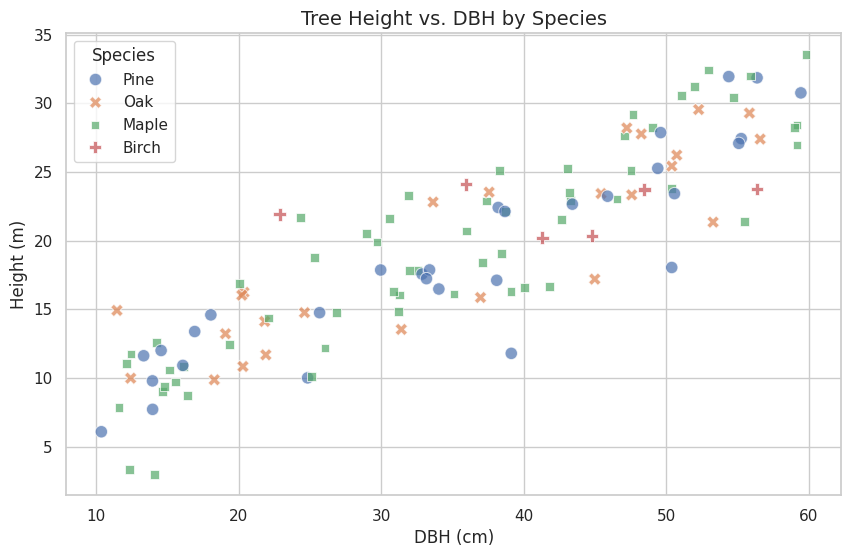

In [ ]:
# Scatter colored by category
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=tree_data, x='dbh_cm', y='height_m',
                hue='species', style='species', s=80, alpha=0.7, ax=ax)

ax.set_xlabel('DBH (cm)', fontsize=12)
ax.set_ylabel('Height (m)', fontsize=12)
ax.set_title('Tree Height vs. DBH by Species', fontsize=14)
ax.legend(title='Species')

plt.show()

### 4.6 Pair Plots for Exploration

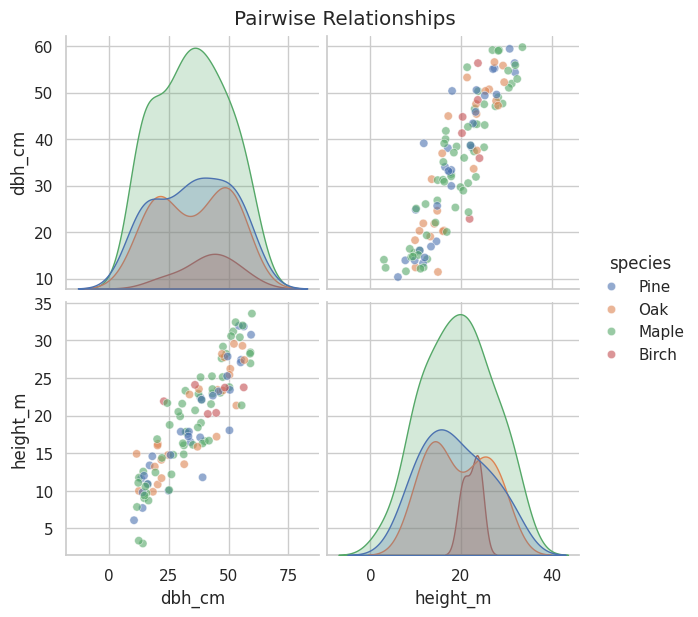

In [ ]:
# Quickly visualize all pairwise relationships
sns.pairplot(tree_data[['dbh_cm', 'height_m', 'species']],
             hue='species', height=3, plot_kws={'alpha': 0.6})

plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

---
## 5. Saving Figures

### 5.1 Basic Saving

/tmp/ipython-input-2257047565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tree_data, x='species', y='height_m', palette='Set2', ax=ax)


Figures saved!


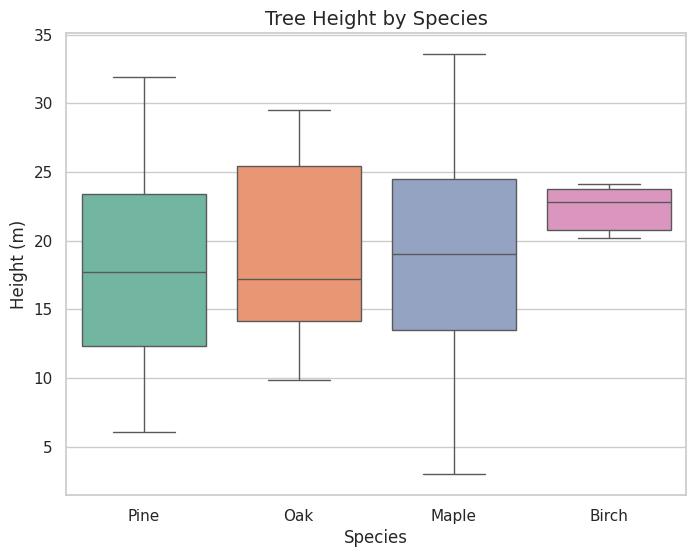

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=tree_data, x='species', y='height_m', palette='Set2', ax=ax)
ax.set_xlabel('Species', fontsize=12)
ax.set_ylabel('Height (m)', fontsize=12)
ax.set_title('Tree Height by Species', fontsize=14)

# Save as PNG (good for presentations, web)
fig.savefig('tree_height_boxplot.png', dpi=300, bbox_inches='tight')

# Save as PDF (good for publications, vector format)
fig.savefig('tree_height_boxplot.pdf', bbox_inches='tight')

print("Figures saved!")
plt.show()

### 5.2 Key Parameters

In [ ]:
print("""
fig.savefig() Key Parameters:
══════════════════════════════════════════════════════════════

dpi=300          Resolution (300 is standard for publications)
bbox_inches='tight'  Removes extra whitespace around figure
facecolor='white'    Background color (default is transparent for PNG)
transparent=True     Transparent background (for PNG)

Common Formats:
──────────────────────────────────────────────────────────────
.png    Raster format, good for web/presentations
.pdf    Vector format, best for publications
.svg    Vector format, good for editing in design software
.jpg    Raster, smaller files but lossy compression

══════════════════════════════════════════════════════════════
""")


fig.savefig() Key Parameters:
══════════════════════════════════════════════════════════════

dpi=300          Resolution (300 is standard for publications)
bbox_inches='tight'  Removes extra whitespace around figure
facecolor='white'    Background color (default is transparent for PNG)
transparent=True     Transparent background (for PNG)

Common Formats:
──────────────────────────────────────────────────────────────
.png    Raster format, good for web/presentations
.pdf    Vector format, best for publications
.svg    Vector format, good for editing in design software
.jpg    Raster, smaller files but lossy compression

══════════════════════════════════════════════════════════════



In [ ]:
# Download files in Colab
from google.colab import files

# Uncomment to download:
# files.download('tree_height_boxplot.png')

---
## 6. Quick Exercise

Create a figure with **1 row and 2 columns**:

1. **Left panel:** Seaborn violin plot of `temperature_c` by `season` from `stream_data`
2. **Right panel:** Seaborn scatter plot of `temperature_c` vs `discharge_cms`, colored by `season`

Add appropriate labels and save the figure as a PNG.

In [ ]:
# Your code here



---
## Summary

### Plot Type Selection Guide

| Data Type | Plot Type | Function |
|-----------|-----------|----------|
| Distribution (1 variable) | Histogram | `ax.hist()`, `sns.histplot()` |
| Compare distributions | Box plot, Violin | `sns.boxplot()`, `sns.violinplot()` |
| Relationship (2 variables) | Scatter | `ax.scatter()`, `sns.scatterplot()` |
| Trend over time | Line | `ax.plot()` |
| Compare categories | Bar | `ax.bar()` |

### Seaborn Advantages
- Works directly with DataFrames
- `hue` parameter for easy grouping
- Built-in statistical features (KDE, regression)
- Better default aesthetics

### Saving Best Practices
- Use `dpi=300` for publications
- Use `bbox_inches='tight'` to remove whitespace
- Use PDF for publications (vector format)
- Use PNG for presentations/web

---
## Solution

In [ ]:
# Exercise Solution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Violin plot
sns.violinplot(data=stream_data, x='season', y='temperature_c',
               palette='coolwarm', ax=axes[0])
axes[0].set_xlabel('Season', fontsize=12)
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].set_title('Temperature Distribution by Season', fontsize=14)

# Right: Scatter plot
sns.scatterplot(data=stream_data, x='discharge_cms', y='temperature_c',
                hue='season', palette='coolwarm', alpha=0.6, ax=axes[1])
axes[1].set_xlabel('Discharge (m³/s)', fontsize=12)
axes[1].set_ylabel('Temperature (°C)', fontsize=12)
axes[1].set_title('Temperature vs. Discharge', fontsize=14)
axes[1].legend(title='Season')

plt.tight_layout()

# Save
fig.savefig('stream_analysis.png', dpi=300, bbox_inches='tight')
print("Figure saved as 'stream_analysis.png'")

plt.show()